## Vehicles 

In this project, i will study a dataframe Containing hundreds of free advertisements for vehicles cars   and determine which factors influence the price of a vehicle.

I will handle the data with the next steps:
1. Exploring the data for first impression on it. 
2. Traeting missing values 
3. Fixing data types and enriching the data (adding columns and creating dictionaries for example).
4. Study the core parameters that could help me understand the data further.
5. Treating outliers and study the "clean" data 
6. Reacing conclusions.


In [3]:
# Loading all the libraries i will use:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import requests 
import io

### Load data

Next, i will load the project data and have a look at the general information

In [9]:

    
# Downloading the csv file from my GitHub account

url = "https://raw.githubusercontent.com/yoav-karsenty/Exploratory-Data-analysis-/main/vehicles_us.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


### Exploring  initial data

In [10]:
# general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [11]:
#a sample of the data
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


From my first look at the data, I have noticed a few things.
1. There are missing values in 5 columns: model_year, cylinders, is_4wd, paint_color and odometer. 
2. Some of these columns have boolean values that should be simple to replace in the case of missing values (is_4wd)
3. some of the columns have values that will be harder if even possible to restore like paint_color.
4.Some columns have inappropriate data types that i will have to change (model_year for example, from float 64 to datetime)

Next, i will explore the missing values and treat them.

### Missing values

First, i will check each column that contains missing values and determine whether the missing values are randomly distributed or corraleted to any columns.  

Model year :

In [12]:
#checking if the missing values have anything to do with a specific model:
(df[df.model_year.isnull()]['model'].value_counts() / df['model'].value_counts()).sort_values()

honda civic lx                       0.041985
honda odyssey                        0.045952
hyundai santa fe                     0.047619
chrysler 300                         0.050633
acura tl                             0.050847
                                       ...   
ford f-250 super duty                0.091286
toyota camry le                      0.091772
jeep grand cherokee laredo           0.097656
gmc yukon                            0.117825
mercedes-benz benze sprinter 2500    0.170732
Name: model, Length: 100, dtype: float64

In [13]:
(df['model'].value_counts()).sort_values()

mercedes-benz benze sprinter 2500      41
nissan murano                         235
kia sorento                           236
acura tl                              236
ford f-250 super duty                 241
                                     ... 
jeep wrangler                        1119
chevrolet silverado                  1271
ram 1500                             1750
chevrolet silverado 1500             2171
ford f-150                           2796
Name: model, Length: 100, dtype: int64

In [14]:
#checking if the missing values have anything to do with a specific model:
df[df.model_year.isnull()]['condition'].value_counts() / df['condition'].value_counts()

excellent    0.068583
fair         0.071562
good         0.071978
like new     0.070224
new          0.069930
salvage      0.104348
Name: condition, dtype: float64

In [15]:
df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [16]:
#checking if the missing values have anything to do with a specific type of vehicle:

df[df.model_year.isnull()]['type'].value_counts() / df['type'].value_counts()

SUV            0.074083
bus                 NaN
convertible    0.060538
coupe          0.062961
hatchback      0.069723
mini-van       0.074074
offroad        0.046729
other          0.085938
pickup         0.072124
sedan          0.069771
truck          0.067676
van            0.061611
wagon          0.071382
Name: type, dtype: float64

From theis investigation, we can see that the missing values in model year are distributed at random, and do not have a strong link to any other column.
next i will replace the missing values in this column with values that are based on other columns that can effect the year of a car. 

In [17]:
#a function that fills the missing values in model_year
df['model_year'] = df.groupby(['condition','type','model'])['model_year'].transform(
lambda grp:grp.fillna(np.mean(grp.mode().max())))

In [18]:
#checking if the replacement worked:

In [19]:
df['model_year'].isna().value_counts()

False    51498
True        27
Name: model_year, dtype: int64

Seems like there are some values that cant be replaced based on these criterions, but they are a very small portion of the data so i will just drop them .  

In [20]:

df['model_year'].dropna(inplace = True)
df = df.dropna( how='any',
                    subset=['model_year'])


In [21]:
#checking if it worked:
df['model_year'].isna().value_counts()

False    51498
Name: model_year, dtype: int64

Cylinders

In [22]:
df['cylinders'].isnull().value_counts()

False    46240
True      5258
Name: cylinders, dtype: int64

In [23]:
df.cylinders.isnull().sum() / df.shape[0]*100

10.2101052468057

In [24]:
#checking if the missing values have anything to do with a specific model:

(df[df.cylinders.isnull()]['model'].value_counts() / df['model'].value_counts()).sort_values() 

bmw x5                               0.059925
ford f150 supercrew cab xlt          0.061162
gmc sierra                           0.069588
nissan rogue                         0.070362
ford f150                            0.073585
                                       ...   
kia soul                             0.131805
jeep grand cherokee laredo           0.132812
subaru impreza                       0.140000
nissan murano                        0.140426
mercedes-benz benze sprinter 2500    0.170732
Name: model, Length: 100, dtype: float64

In [25]:
#checking if the missing values have anything to do with a specific transmission type:

(df[df.cylinders.isnull()]['transmission'].value_counts() / df['transmission'].value_counts()).sort_values() 

other        0.095875
automatic    0.101990
manual       0.107888
Name: transmission, dtype: float64

From theis investigation, we can see that the missing values in cylinders are distributed at random, and do not have a strong link to any other column.
next i will replace the missing values in this column with values that are based on other columns that can effect number of cylinders in a car. 

In [26]:
df['cylinders'].value_counts()

8.0     15838
6.0     15694
4.0     13851
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [27]:
#a function that fills the missing values in cylinders

df['cylinders'] = df.groupby(['model'])['cylinders'].transform(
lambda grp:grp.fillna((grp.mode().max())))

In [28]:
#cheacking if it worked:
df['cylinders'].isnull().value_counts()

False    51498
Name: cylinders, dtype: int64

In [29]:
#checking if the missing values have anything to do with a specific model:

(df[df.odometer.isnull()]['model'].value_counts() / df['model'].value_counts()).sort_values()

chevrolet camaro                     0.106280
dodge dakota                         0.107884
jeep cherokee                        0.116041
ford f350 super duty                 0.118367
honda cr-v                           0.118421
                                       ...   
ford escape                          0.185714
nissan maxima                        0.190476
nissan versa                         0.190476
kia sorento                          0.190678
mercedes-benz benze sprinter 2500    1.000000
Name: model, Length: 100, dtype: float64

Its the third time  that the 'mercedes-benz benze sprinter 2500' model has the most percentage of missing values. I need to see what is going on there.

In [30]:
df[df.model == 'mercedes-benz benze sprinter 2500']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16
1642,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-04,36
2232,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-08-23,70
2731,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-04-12,31
4149,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-10-12,28
4681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-10-02,32
5681,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-12-11,34
8975,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-09-24,45
10600,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2018-09-16,47
11541,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,NaN,NaN,2018-05-28,24


It seems this model has curapted values, and it only has 43 entries. I will remove the entries about this model and inform the person who collected the data. 

In [31]:
#locating and dropping the rows about this model
df.drop(df.loc[df['model']=='mercedes-benz benze sprinter 2500'].index, inplace=True)


In [32]:
#checking if it worked
df[df.model == 'mercedes-benz benze sprinter 2500']

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed


In [33]:
##checking if the missing values have anything to do with a specific model year:

(df[df.odometer.isnull()]['model_year'].value_counts())

2014.0    602
2013.0    599
2012.0    578
2015.0    551
2011.0    546
2008.0    510
2016.0    485
2007.0    425
2010.0    410
2017.0    407
2018.0    374
2005.0    344
2006.0    335
2009.0    332
2004.0    268
2003.0    220
2002.0    166
2001.0    133
2000.0    133
1999.0     82
1998.0     63
1997.0     55
2019.0     52
1996.0     26
1995.0     24
1993.0     22
1994.0     19
1989.0     14
1986.0      8
1992.0      8
1990.0      8
1991.0      6
1978.0      4
1988.0      4
1968.0      4
1966.0      4
1970.0      3
1977.0      3
1983.0      2
1973.0      1
1981.0      1
1908.0      1
1982.0      1
1971.0      1
1985.0      1
1976.0      1
1979.0      1
1974.0      1
1980.0      1
1987.0      1
1929.0      1
1960.0      1
1964.0      1
1975.0      1
1963.0      1
Name: model_year, dtype: int64

In [34]:
df['model_year'].value_counts()

2014.0    3878
2013.0    3865
2012.0    3777
2011.0    3656
2015.0    3596
          ... 
1948.0       1
1961.0       1
1936.0       1
1949.0       1
1955.0       1
Name: model_year, Length: 68, dtype: int64

In [35]:
#checking if the missing values have anything to do with a specific transmission type:

df[df.odometer.isnull()]['transmission'].value_counts()

automatic    7140
manual        425
other         280
Name: transmission, dtype: int64

In [36]:
df['transmission'].value_counts()

automatic    46836
manual        2827
other         1794
Name: transmission, dtype: int64

From theis investigation, we can see that the missing values in 'odometer' are distributed at random, and do not have a strong link to any other column. next i will replace the missing values in this column with values that are based on other columns that can effect the mileage of a car.



In [37]:
#a function that fills the missing values in odometer

df['odometer'] = df.groupby(['model','model_year','condition'])['odometer'].transform(
lambda grp:grp.fillna(grp.mode().max()))

In [38]:
df.odometer.isnull().value_counts()

False    51185
True       272
Name: odometer, dtype: int64

In [39]:
df.odometer.isnull\
().sum() / df.shape[0]*100

0.5285966923839323

Since the percentage of missing values is so small, we can just drop it  

In [40]:
df.dropna(subset = ["odometer"], inplace=True)

In [41]:
df.odometer.isnull\
().sum() / df.shape[0]

0.0

is_4wd 

In [42]:
df['is_4wd'].value_counts()

1.0    25460
Name: is_4wd, dtype: int64

In [43]:
df['is_4wd'].isnull().value_counts()

True     25725
False    25460
Name: is_4wd, dtype: int64

We can see that the values in 'is_4wd' are boolean values, that were probably filled if the vehicle was 4wd and ware left empyt if not. in that case i will replace the missing values with 0 so we will get 1,0 values - yes or no.

In [44]:
#filling the missing values 
df['is_4wd'] = df['is_4wd'].fillna(0)

In [45]:
df['is_4wd'].isnull().value_counts()

False    51185
Name: is_4wd, dtype: int64

In [46]:
#checking:
df['is_4wd'].value_counts()

0.0    25725
1.0    25460
Name: is_4wd, dtype: int64

paint_color

In [47]:
df['paint_color'].value_counts()

white     9971
black     7626
silver    6216
grey      5015
blue      4450
red       4385
green     1381
brown     1211
custom    1145
yellow     253
orange     230
purple     100
Name: paint_color, dtype: int64

In [48]:
df['paint_color'].isnull().value_counts()

False    41983
True      9202
Name: paint_color, dtype: int64

In [49]:
df[df['paint_color'].isnull()]['model'].value_counts()

ford f-150                    476
chevrolet silverado 1500      389
ram 1500                      333
jeep wrangler                 235
chevrolet silverado           210
                             ... 
jeep grand cherokee laredo     38
kia sorento                    36
chrysler 200                   35
chevrolet silverado 3500hd     35
chevrolet trailblazer          35
Name: model, Length: 99, dtype: int64

We have no way to know what the missing colors are, so ill replace them with unknown, since their are too many of them to drop all the rows without distorting the data

In [50]:
df['paint_color'] = df['paint_color'].fillna('unknown')

## Fix data types

As the data is more or less complete now, i will adress the data types and fix the data types if required.

In [51]:
#checking for duplicates in the data:
df.duplicated().sum()

0

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51185 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51185 non-null  int64  
 1   model_year    51185 non-null  float64
 2   model         51185 non-null  object 
 3   condition     51185 non-null  object 
 4   cylinders     51185 non-null  float64
 5   fuel          51185 non-null  object 
 6   odometer      51185 non-null  float64
 7   transmission  51185 non-null  object 
 8   type          51185 non-null  object 
 9   paint_color   51185 non-null  object 
 10  is_4wd        51185 non-null  float64
 11  date_posted   51185 non-null  object 
 12  days_listed   51185 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.5+ MB


In [53]:
#changing float64 data types to int 64 
df['model_year'] = df['model_year'].astype('int')
df['cylinders'] = df['cylinders'].astype('int')
df['odometer'] = df['odometer'].astype('int')
df['is_4wd'] = df['is_4wd'].astype('int')



In [54]:
#checking
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51185 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   price         51185 non-null  int64 
 1   model_year    51185 non-null  int64 
 2   model         51185 non-null  object
 3   condition     51185 non-null  object
 4   cylinders     51185 non-null  int64 
 5   fuel          51185 non-null  object
 6   odometer      51185 non-null  int64 
 7   transmission  51185 non-null  object
 8   type          51185 non-null  object
 9   paint_color   51185 non-null  object
 10  is_4wd        51185 non-null  int64 
 11  date_posted   51185 non-null  object
 12  days_listed   51185 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 5.5+ MB


## Enrich data

In this part, I will add additional factors to the data to make the analysis easier.

In [55]:
#checking the date_posted type 
type(df['date_posted'][0]) 

str

Next i will add datetime values for when the ad was placed



In [56]:

df['date_posted'] = pd.to_datetime(df['date_posted'], format='%Y-%m-%d')
df['day'] = pd.DatetimeIndex(df['date_posted']).weekday
df['month'] = pd.DatetimeIndex(df['date_posted']).month
df['year'] = pd.DatetimeIndex(df['date_posted']).year

In [57]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year
0,9400,2011,bmw x5,good,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018
1,25500,2004,ford f-150,good,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018
2,5500,2013,hyundai sonata,like new,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019
3,1500,2003,ford f-150,fair,8,gas,233000,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019
4,14900,2017,chrysler 200,excellent,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019


In [58]:
# a function that adds the vehicle's age when the ad was placed
def vehac_age(x,y):
    return x - y 
df["vehicles_age"] = vehac_age(df["year"], df["model_year"])


In [59]:
# a function that adds the vehicle's average mileage per year
def vehicles_average_mileage_fun(odometer,vehicles_age):
    return odometer / vehicles_age 
df[" vehicles_average_mileage"] = vehicles_average_mileage_fun(df["odometer"], df["vehicles_age"])



In [60]:
#a function that replaces the condition values with something that can be manipulated more easily
def replace_con(condition):
    
    if condition  == 'new':
        return 5
        
    elif condition  == 'like new':
        return 4
    elif condition  == 'excellent':
        return 3
    elif condition  == 'good':
        return 2
    elif condition  == 'fair':
        return 1
    elif condition  == 'salvage':
        return 0
    
df['condition'] = df['condition'].apply(replace_con)

## Check clean data

Now i want to see that everything seems ok and i am good to go further:

In [61]:
# general/summary information about the DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 51185 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      51185 non-null  int64         
 1   model_year                 51185 non-null  int64         
 2   model                      51185 non-null  object        
 3   condition                  51185 non-null  int64         
 4   cylinders                  51185 non-null  int64         
 5   fuel                       51185 non-null  object        
 6   odometer                   51185 non-null  int64         
 7   transmission               51185 non-null  object        
 8   type                       51185 non-null  object        
 9   paint_color                51185 non-null  object        
 10  is_4wd                     51185 non-null  int64         
 11  date_posted                51185 non-null  datetime64[ns]
 12  days

In [62]:
# a sample of data
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,day,month,year,vehicles_age,vehicles_average_mileage
0,9400,2011,bmw x5,2,6,gas,145000,automatic,SUV,unknown,1,2018-06-23,19,5,6,2018,7,20714.285714
1,25500,2004,ford f-150,2,6,gas,88705,automatic,pickup,white,1,2018-10-19,50,4,10,2018,14,6336.071429
2,5500,2013,hyundai sonata,4,4,gas,110000,automatic,sedan,red,0,2019-02-07,79,3,2,2019,6,18333.333333
3,1500,2003,ford f-150,1,8,gas,233000,automatic,pickup,unknown,0,2019-03-22,9,4,3,2019,16,14562.500000
4,14900,2017,chrysler 200,3,4,gas,80903,automatic,sedan,black,0,2019-04-02,28,1,4,2019,2,40451.500000


## Study core parameters

in the next part, i will study the parameters listed below, so  i could tell how outliers affect the form and readability of the histograms.]

The parameters are
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

In [63]:
# a function that shows the distribution by plotting histograms and describes the statistics of the distribution
   
def distribution_stats(parameter, df):
    print('The histogram of: {}'.format(parameter))
    
    plt.xlabel("{}".format(parameter))
    plt.ylabel("amount") 
    df[parameter].hist(bins = 20)
    
    plt.show()
    if df[parameter].mean()>df[parameter].median():
        print('The distribution is skewed to the right')
    else:
        print('The distribution is skewed to the left')
    print()
    print('Statistics on: {}'.format(parameter))
    print(df[parameter].describe())
    upper_limit = np.percentile(df[parameter], 99)
    lower_limit = np.percentile(df[parameter], 1)
    print()
    print('min border:',lower_limit)
    print('max border:',upper_limit)
    print()
    print('The outliers are considered to be values below',lower_limit, "and above",upper_limit)
    print('We have',len(df[(df[parameter]<lower_limit)|(df[parameter]>upper_limit)]),"values that we can consider outliers")
   




The histogram of: price


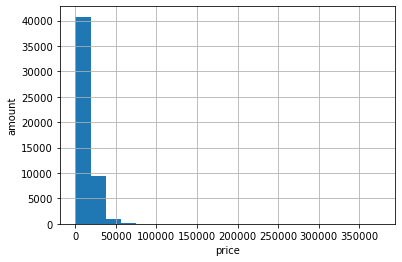

The distribution is skewed to the right

Statistics on: price
count     51185.000000
mean      12132.898193
std       10023.216000
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16800.000000
max      375000.000000
Name: price, dtype: float64

min border: 1.0
max border: 43995.0

The outliers are considered to be values below 1.0 and above 43995.0
We have 510 values that we can consider outliers
The histogram of: vehicles_age


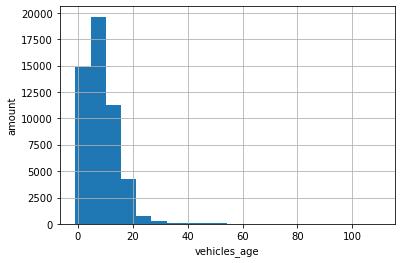

The distribution is skewed to the right

Statistics on: vehicles_age
count    51185.000000
mean         8.414477
std          6.127628
min         -1.000000
25%          4.000000
50%          7.000000
75%         12.000000
max        110.000000
Name: vehicles_age, dtype: float64

min border: 0.0
max border: 27.0

The outliers are considered to be values below 0.0 and above 27.0
We have 493 values that we can consider outliers
The histogram of: odometer


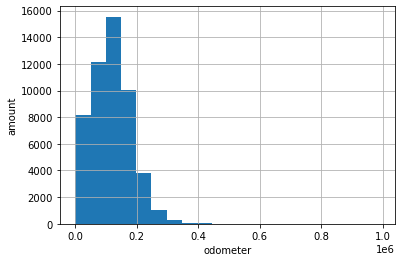

The distribution is skewed to the right

Statistics on: odometer
count     51185.000000
mean     117690.729452
std       66059.837579
min           0.000000
25%       72000.000000
50%      114949.000000
75%      157508.000000
max      990000.000000
Name: odometer, dtype: float64

min border: 119.0
max border: 294223.0

The outliers are considered to be values below 119.0 and above 294223.0
We have 1014 values that we can consider outliers
The histogram of: cylinders


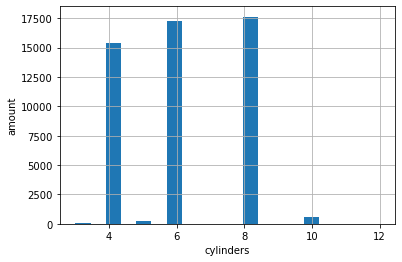

The distribution is skewed to the right

Statistics on: cylinders
count    51185.000000
mean         6.122653
std          1.658336
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

min border: 4.0
max border: 10.0

The outliers are considered to be values below 4.0 and above 10.0
We have 36 values that we can consider outliers
The histogram of: condition


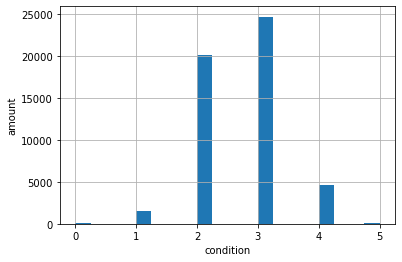

The distribution is skewed to the left

Statistics on: condition
count    51185.000000
mean         2.637687
std          0.706774
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64

min border: 1.0
max border: 4.0

The outliers are considered to be values below 1.0 and above 4.0
We have 225 values that we can consider outliers


In [64]:
# apllying the function on the columns in interest:

for parameter in ['price','vehicles_age','odometer','cylinders','condition']:
    distribution_stats(parameter, df)


## Study and treat outliers

Given the results above,i determined that the columns that needs to get an 'outliers treatment' are 'price','vehicles_age'and 'odometer'. condition and cylinders have too little value counts and all of their "outliers" are with the lower/upper limits for normal range of values, so i wont remove their outliers in order to not distort the data.

In [65]:
#finding the borders that outliers will be determined by:
borders = []
for parameter in ['price','vehicles_age','odometer']:
    upper_limit = np.percentile(df[parameter], 99)
    lower_limit = np.percentile(df[parameter], 1)
    borders.append([parameter,upper_limit,lower_limit])
   


In [66]:
border_data = pd.DataFrame(borders, columns = ['parameter', 'min_border', 'lower_border'])
border_data            

,parameter,min_border,lower_border
0,price,43995.0,1.0
1,vehicles_age,27.0,0.0
2,odometer,294223.0,119.0


The price lower border is too low in my opinion, i will correct that in the filters i wil use.

In [67]:
filter1 = (df['price'] < np.percentile(df['price'], 97)) & (df['price'] > np.percentile(df["price"], 3))

In [68]:
filter2 = (df['vehicles_age'] > 0) & (df['vehicles_age'] < 21)

In [69]:
filter3 = (df['odometer'] > 134) & (df['odometer'] < 326000)

In [70]:
#  functions to filter out the oultiers 
def percentile_filter(df, col, percentile, smaller):
    if smaller:
        return df[col] < np.percentile(df[col], percentile)
    else:
        return df[col] > np.percentile(df[col], percentile)

def remove_outliers(df):
    filters = list()
    for col in ['price', 'vehicles_age', 'odometer']:
        filters.append(percentile_filter(df,col,99, smaller=True) & percentile_filter(df,col,1, smaller=False))
    
    return df[filters[0] & filters[1] & filters[2]]

In [71]:
#saving the filterd data in a new dataset:
clean_data = df.groupby(['type', "condition"], as_index=False).apply(remove_outliers)

In [72]:
#information about the new dataset:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 45933 entries, (0, 686) to (66, 51248)
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   price                      45933 non-null  int64         
 1   model_year                 45933 non-null  int64         
 2   model                      45933 non-null  object        
 3   condition                  45933 non-null  int64         
 4   cylinders                  45933 non-null  int64         
 5   fuel                       45933 non-null  object        
 6   odometer                   45933 non-null  int64         
 7   transmission               45933 non-null  object        
 8   type                       45933 non-null  object        
 9   paint_color                45933 non-null  object        
 10  is_4wd                     45933 non-null  int64         
 11  date_posted                45933 non-null  datetime64[

In [73]:
clean_data.shape[0] / df.shape[0] *100

89.73918140080102

In the next step, I will compaire clean_data  with the earlier dataset (that included outliers).

In [74]:
# a function that gives information and visualisation of the new dataset without outliers
def no_out_distribution_stats(parameter, df): 
        
        print('The histogram of: {}'.format(parameter))

        plt.xlabel("{}".format(parameter))
        plt.ylabel("amount") 
        df[parameter].hist(bins = 20)

        plt.show()
        if df[parameter].mean()>df[parameter].median():
            print('The distribution is skewed to the right')
        else:
            print('The distribution is skewed to the left')
        print()
        print('Statistics on: {}'.format(parameter))
        print(df[parameter].describe())
        print()


The histogram of: price


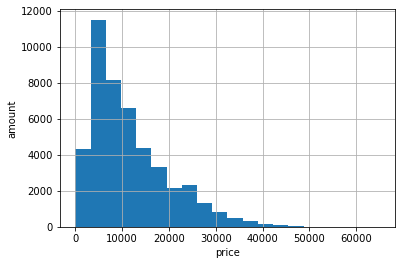

The distribution is skewed to the right

Statistics on: price
count    45933.000000
mean     11658.549735
std       8338.612628
min         10.000000
25%       5400.000000
50%       8999.000000
75%      15995.000000
max      65000.000000
Name: price, dtype: float64

The histogram of: vehicles_age


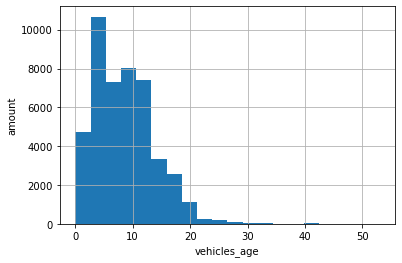

The distribution is skewed to the right

Statistics on: vehicles_age
count    45933.000000
mean         8.539656
std          5.350094
min          0.000000
25%          4.000000
50%          8.000000
75%         12.000000
max         53.000000
Name: vehicles_age, dtype: float64

The histogram of: odometer


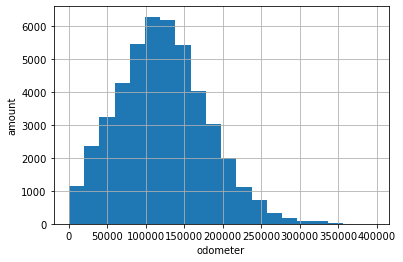

The distribution is skewed to the right

Statistics on: odometer
count     45933.000000
mean     121632.216642
std       57663.339891
min           1.000000
25%       81000.000000
50%      119156.000000
75%      158830.000000
max      395411.000000
Name: odometer, dtype: float64

The histogram of: cylinders


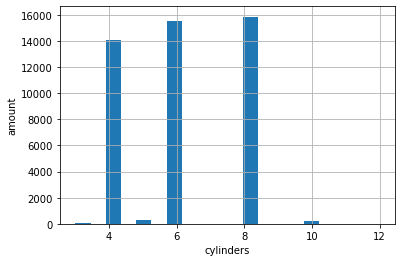

The distribution is skewed to the right

Statistics on: cylinders
count    45933.000000
mean         6.090588
std          1.639119
min          3.000000
25%          4.000000
50%          6.000000
75%          8.000000
max         12.000000
Name: cylinders, dtype: float64

The histogram of: condition


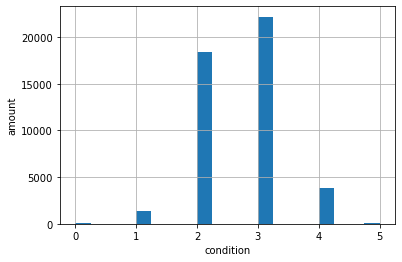

The distribution is skewed to the left

Statistics on: condition
count    45933.000000
mean         2.619903
std          0.690799
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          5.000000
Name: condition, dtype: float64



In [75]:
# apllying the function on the columns in interest:
for parameter in ['price','vehicles_age','odometer','cylinders','condition']:
    no_out_distribution_stats(parameter, clean_data)

In [76]:
#a function that compares histograms of the dataset with outliers (df) and the dataset without outliers(clean_data)
def with_outliers_and_without(df,clean_data,parameter):
    
    plt.xlabel("{}".format(parameter))
    plt.ylabel("amount")
    plt.hist(df[parameter],bins = 20, alpha=0.5, label= 'df')
    plt.hist(clean_data[parameter],bins = 20, alpha=0.9, label = 'clean_data')
    plt.legend(loc='upper right')

    plt.show()

   
             
    

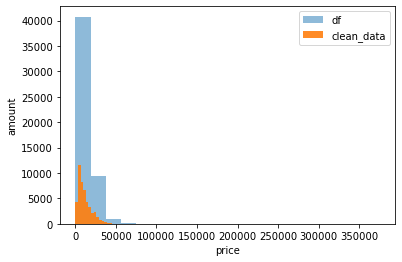

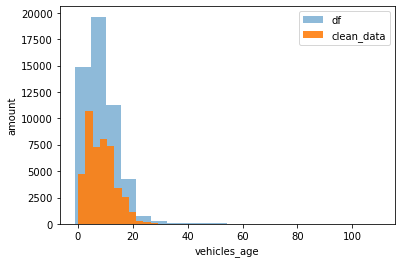

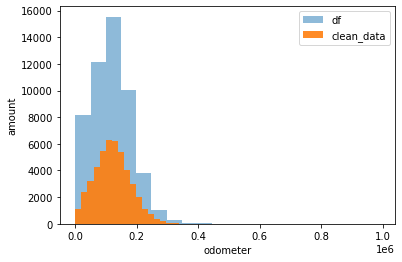

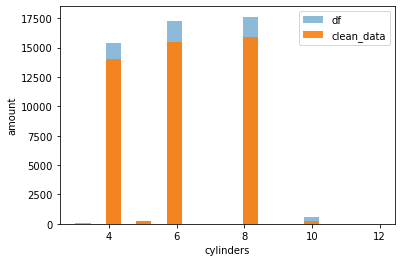

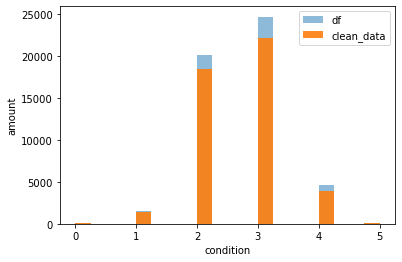

In [77]:
#apllying the function on the columns in interest:
for parameter in ['price','vehicles_age','odometer','cylinders','condition']:
    with_outliers_and_without(df,clean_data,parameter)

In [78]:
#how muchg data did we lose:
(1 - (clean_data.shape[0] / df.shape[0]))*100

10.260818599198984

after Comparing the filterd data above and the the whole dataset investigation i did before, i can see that the outliers had a lot of impact.The filterd data is muchg more readable and its histograms look normal with normal skewness.clean_data looks a lot smaller than df, but from the check i did above we can see that we lost only 10.26% of the data after removing the outiers.

## Ads lifetime

Next, i will study how many days advertisements were displayed (`days_listed`). i will Calculate the mean and median and describe the typical lifetime of an ad.  After that i could determine when ads were removed quickly, and when they were listed for an abnormally long time.

count    45933.000000
mean        39.564431
std         28.209722
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64



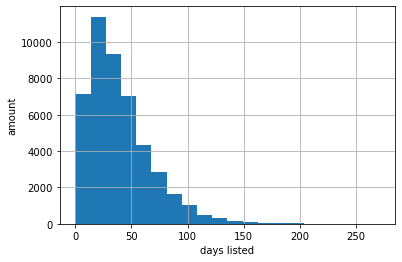

The typical lifetime of an add is 39.564430801384624 days


In [79]:
print(clean_data.days_listed.describe())
print()


plt.ylabel("amount") 
plt.xlabel("days listed")
clean_data["days_listed"].hist(bins = 20)
plt.show()
print ("The typical lifetime of an add is {} days".format(clean_data.days_listed.mean()))


#filterd datasets with short ads and long ads, will help me understand determine when ads were removed and why,if there is a reason
too_long = clean_data[percentile_filter(clean_data,"days_listed",90,smaller = False)]
too_short = clean_data[percentile_filter(clean_data,"days_listed",2,smaller = True)]

In [80]:
# a function that checks corralations and visualise them.
def days_corrs(df):
    
    for col in ['odometer', 'vehicles_age','condition','price']:
        df.plot.scatter(x='days_listed',y=col)
        print(f'{col}: {df["days_listed"].corr(df[col])}')

odometer: 0.057555347259002396
vehicles_age: -0.003990502150949656
condition: 0.01815061738323553
price: 0.0024347181516316714


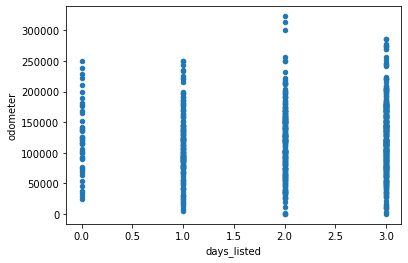

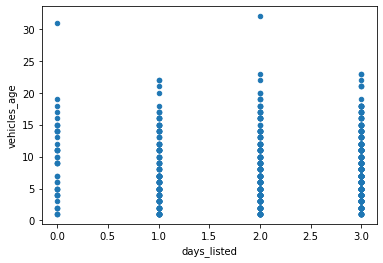

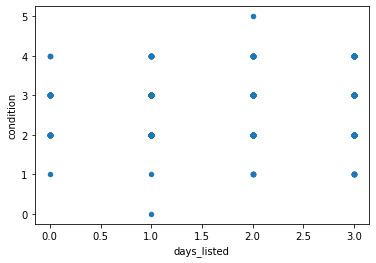

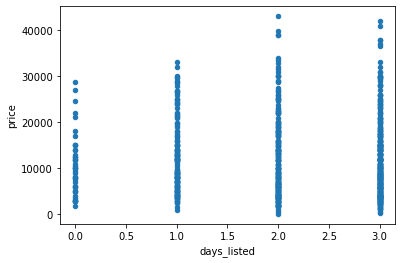

In [81]:
#applyng the function on the filterd dataset with ads that were removed shortly :
days_corrs(too_short)

odometer: 0.014074261517078543
vehicles_age: 0.00954294873667488
condition: 0.005021393396455145
price: -0.03255562326242447


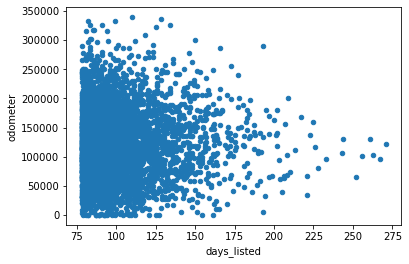

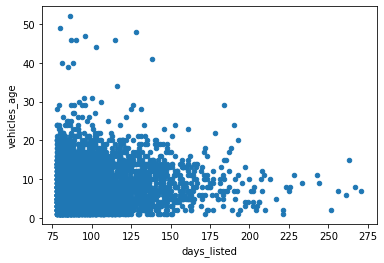

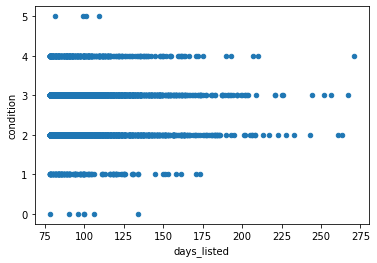

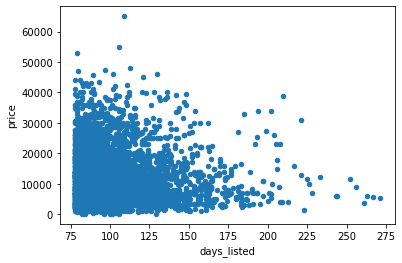

In [82]:
#applyng the function on the filterd dataset with ads that were removed after a long period of time :

days_corrs(too_long)

After investigating, i could not determine when ads were removed quickly, and when they were listed for an abnormally long time. It seems there are no strong evidance that there is a parameter that effects the life of an add.

## Average price per each type of vehicle

Next, i will analyze the number of ads and the average price for each type of vehicleand will select the two types with the greatest number of ads for further investigation.

In [83]:
ads_group = clean_data.groupby(['type'])['price'].agg(['count','mean']).reset_index().sort_values('count',ascending = False)
ads_group

,type,count,mean
0,SUV,11152,10784.420642
9,sedan,11012,6775.980748
10,truck,11003,16199.538308
8,pickup,6120,15227.580556
3,coupe,1995,14096.052130
12,wagon,1376,8827.843023
5,mini-van,1044,7749.052682
4,hatchback,940,6692.808511
11,van,497,8223.050302
2,convertible,393,13953.648855


In [84]:
greatest_ads = list(ads_group.head(2)['type'])
greatest_ads

['SUV', 'sedan']

## Price factors

Next, i will study wich factors impact the price the most, by studyng each of the popular types i detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color),i will plot box-and-whisker charts, and create scatterplots for the rest. 

In [85]:
suv = clean_data[clean_data['type']=='SUV']

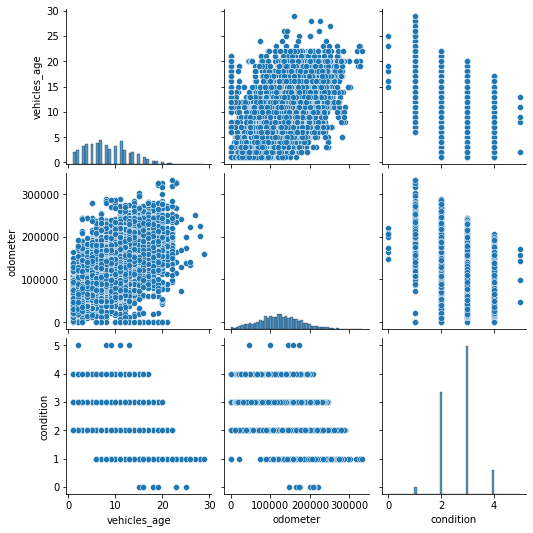

In [86]:
suv_scatter = suv[['vehicles_age','odometer','condition']]
sns.pairplot(suv_scatter)

In [87]:
sedan = clean_data[clean_data['type']=='sedan']

In [88]:
def corrs(df):
    
    for col in ['odometer', 'vehicles_age','condition']:
        df.plot.scatter(x='price',y=col)
        print(f'{col}: {df["price"].corr(df[col])}')

odometer: -0.597793122375819
vehicles_age: -0.6277488945915648
condition: 0.30270594343187335


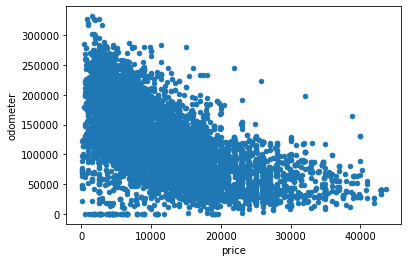

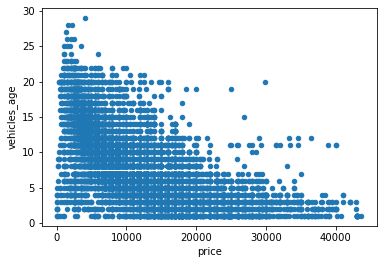

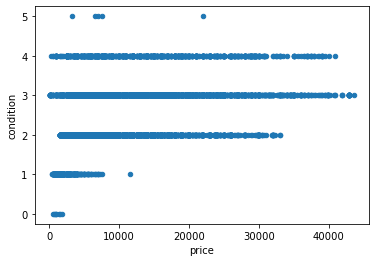

In [89]:
corrs(suv)

odometer: -0.5632852023844458
vehicles_age: -0.6507326323093058
condition: 0.32747429166170944


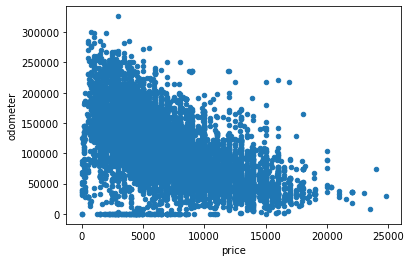

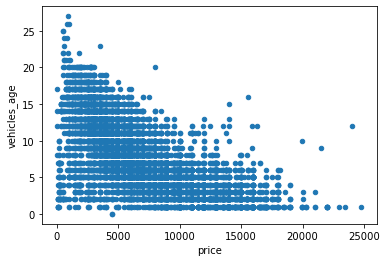

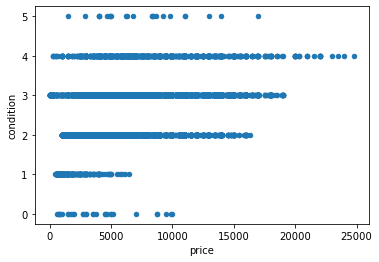

In [90]:
corrs(sedan)

odometer: -0.460389732135901
vehicles_age: -0.4890880963733584
condition: 0.24150584950397355


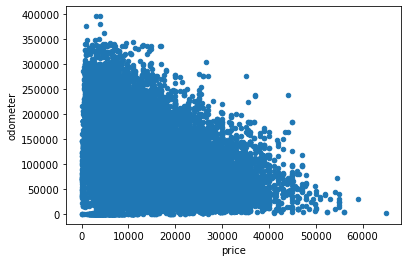

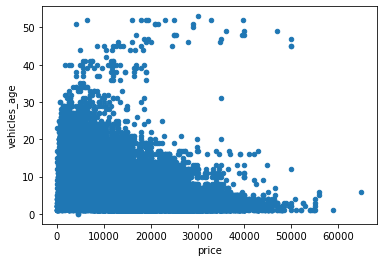

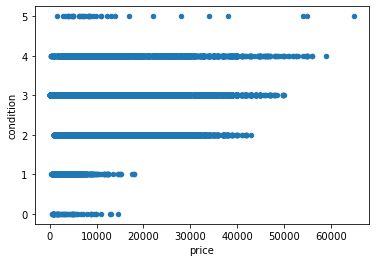

In [91]:
corrs(clean_data)

Ccategorical variables
for categorical variables, as paint color and transmission type, i will have to check there are at least 50 ads in order to make an observation on it.

In [92]:
#checking for 50 ads in paint color in suv:
suv['paint_color'].value_counts()

unknown    1985
black      1953
white      1760
silver     1436
grey       1093
blue        959
red         819
green       378
brown       345
custom      261
orange       80
yellow       44
purple       39
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

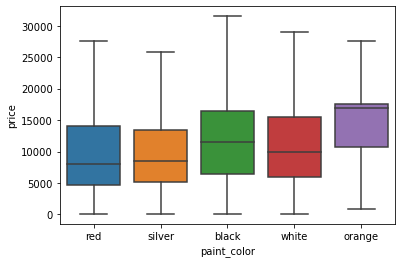

In [93]:
#dividing into groups for better Readability :
color_group1 = suv.query('paint_color == "red" |paint_color ==  "silver"|paint_color == "black"|paint_color == "white"|paint_color == "orange"')

sns.boxplot(x='paint_color',y = 'price',data = color_group1,showfliers = False)




<AxesSubplot:xlabel='paint_color', ylabel='price'>

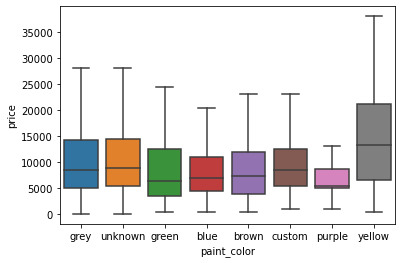

In [94]:
color_group2  = suv.query('paint_color != "red" & paint_color !=  "silver" & paint_color != "black" & paint_color != "white"& paint_color != "orange"')
sns.boxplot(x='paint_color',y = 'price',data = color_group2,showfliers = False)


It seems that colors can make n suv vehicle more expensive, and the colors that will impact the price of an suv are: orange, black .yellow  doesn’t have enough samples (44) so we cant put it in the same list.  

In [95]:

#checking for 50 ads in paint color in sedan:
sedan['paint_color'].value_counts()

unknown    1976
silver     1882
black      1614
grey       1501
white      1335
blue       1123
red         853
custom      248
brown       241
green       190
purple       23
yellow       19
orange        7
Name: paint_color, dtype: int64

<AxesSubplot:xlabel='paint_color', ylabel='price'>

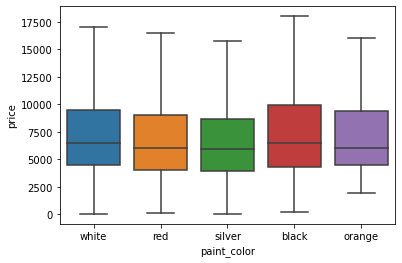

In [96]:
#dividing into groups for better Readability :
color_sedan1 = sedan.query('paint_color == "red" |paint_color ==  "silver"|paint_color == "black"|paint_color == "white"|paint_color == "orange"')

sns.boxplot(x='paint_color',y = 'price',data = color_sedan1,showfliers = False)




<AxesSubplot:xlabel='paint_color', ylabel='price'>

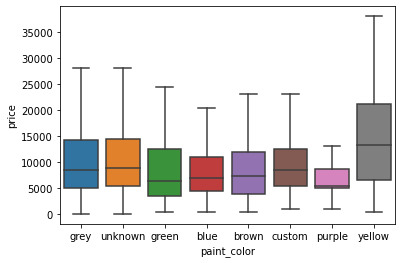

In [97]:
color_sedan2  = suv.query('paint_color != "red" & paint_color !=  "silver" & paint_color != "black" & paint_color != "white"& paint_color != "orange"')
sns.boxplot(x='paint_color',y = 'price',data = color_sedan2,showfliers = False)


It seems that in sedan, the impact on the price by color is less than in suv, with no color (with enough samples) that we can point on that is significantly different than the others.

It is important to point that there are 1976 values that we filled with unknown in sedan and 1985 in suv, so the data is not accurate as we would like it to be in thos observation.

Transmission 

In [98]:
#checking for 50 ads in suv  'transmission':

suv['transmission'].value_counts()

automatic    10619
manual         445
other           88
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

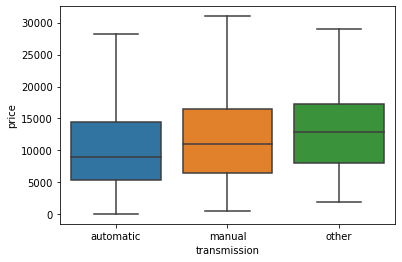

In [99]:
sns.boxplot(x='transmission',y = 'price',data = suv,showfliers = False)

It seems like manuel transmision and 'other' has a higher price mean then automatic transmission for suv -  'other' with the highest, then manual then automatic.

sedan

In [100]:
#checking for 50 ads in sedan 'transmission':

sedan['transmission'].value_counts()

automatic    10425
manual         527
other           60
Name: transmission, dtype: int64

<AxesSubplot:xlabel='transmission', ylabel='price'>

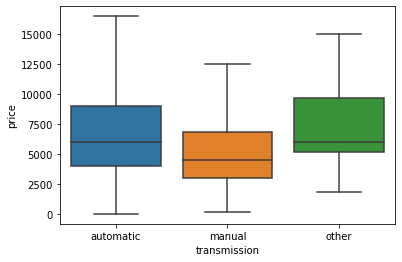

In [101]:
sns.boxplot(x='transmission',y = 'price',data = sedan,showfliers = False)

In sedan, it seems like automatic transmission and 'other' has a higher price mean then manuel transmisioautomatic transmission  -  automatic with the highest, then 'other' and then manuel.

## General conclusion

In this project, i wanted to  determine which factors influence the price of a vehicle. in order to do that i did the following :
- I explored the data in order to understand what needs to be done
- I dealt with missing values in the data and decided in wich columns i can restore the missing values (model_year,odometer, cylinders and is4wd) and in wich i cant (paint_color)
- I added columns and changed data types so ii could investigate the data better
- I studied the core parameters that in order to understand the data further.
- I treating outliers and studied the "clean" data

All of these steps got me to the next conclusions: 
The factors that influence the price of a vehiclethe most are the vehicles age and mileage. 
We can see those corralation in the cars with the highest average price per type of vehicle - suv, and sedan- and also in the whole dataset:


suv 
odometer: -0.5977931223758187
vehicles_age: -0.6277488945915651


sedan 


odometer: -0.5632852023844456
vehicles_age: -0.6507326323093059

The whole data - 

odometer: -0.46038973213590073
vehicles_age: -0.4890880963733583

we can see that there are negative corralations, wich means that the price is higher when the age of a vehicles and its mileage are low, and low when they are high. 

The condition of a vehicle also effects the price of a vehicle but a little less than the vehicles age and mileage with 0.2415058495039730 corralation. This is a positive corralation that means the higher the numbers are (the better the condition) the higher the price. 
it seems like the color of a vehicles and the transmission type also influence the price, but not in a conclusive way that i can make a certain statement about.